## Local Runtime

In [1]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn modules for machine learning and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_curve, auc, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# XGBoost for gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# Hyperopt for hyperparameter optimization
from hyperopt import fmin, hp, tpe

In [ ]:
labs = pd.read_csv('C:\\Users\\redacted\\OneDrive\\Desktop\\Ominous Void\\National Health and Nutrition Examination Survey Dataset\\labs.csv')
exam = pd.read_csv('C:\\Users\\redacted\\OneDrive\\Desktop\\Ominous Void\\National Health and Nutrition Examination Survey Dataset\\examination.csv')
demo = pd.read_csv('C:\\Users\\redacted\\OneDrive\\Desktop\\Ominous Void\\National Health and Nutrition Examination Survey Dataset\\demographic.csv')
diet = pd.read_csv('C:\\Users\\redacted\\OneDrive\\Desktop\\Ominous Void\\National Health and Nutrition Examination Survey Dataset\\diet.csv')
ques = pd.read_csv('C:\\Users\\redacted\\OneDrive\\Desktop\\Ominous Void\\National Health and Nutrition Examination Survey Dataset\\questionnaire.csv')

# removes SEQN from 4/5 datasets to prevent dupliates
exam.drop(['SEQN'], axis = 1, inplace=True)
demo.drop(['SEQN'], axis = 1, inplace=True)
diet.drop(['SEQN'], axis = 1, inplace=True)
ques.drop(['SEQN'], axis = 1, inplace=True)

# joins the 4 datasets together
df = pd.concat([labs, exam], axis=1, join='inner')
df = pd.concat([df, demo], axis=1, join='inner')
df = pd.concat([df, diet], axis=1, join='inner')
df = pd.concat([df, ques], axis=1, join='inner')

## Hosted Runtime Alternative

In [ ]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn modules for machine learning and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_curve, auc, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# XGBoost for gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# Hyperopt for hyperparameter optimization
from hyperopt import fmin, hp, tpe

# Google Colab for mounting Google Drive
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
labs = pd.read_csv('/content/drive/MyDrive/redacted/labs.csv')
exam = pd.read_csv('/content/drive/MyDrive/redacted/examination.csv')
demo = pd.read_csv('/content/drive/MyDrive/redacted/demographic.csv')
diet = pd.read_csv('/content/drive/MyDrive/redacted/diet.csv')
ques = pd.read_csv('/content/drive/MyDrive/redacted/questionnaire.csv')

# removes SEQN from 4/5 datasets to prevent dupliates
exam.drop(['SEQN'], axis = 1, inplace=True)
demo.drop(['SEQN'], axis = 1, inplace=True)
diet.drop(['SEQN'], axis = 1, inplace=True)
ques.drop(['SEQN'], axis = 1, inplace=True)

# joins the 4 datasets together
df = pd.concat([labs, exam], axis=1, join='inner')
df = pd.concat([df, demo], axis=1, join='inner')
df = pd.concat([df, diet], axis=1, join='inner')
df = pd.concat([df, ques], axis=1, join='inner')

## Understanding The Dataset

In [ ]:
# SI columns are duplicate columns that give unit conversions (removing SI units)
cols = [c for c in df.columns if c[-2:] != 'SI']
df = df[cols]
data = df

In [ ]:
# Counts the number of samples per catagory
data["SEQN"].value_counts()

73557    1
80348    1
80341    1
80342    1
80343    1
        ..
76953    1
76954    1
76955    1
76956    1
83731    1
Name: SEQN, Length: 9813, dtype: int64

In [ ]:
# Counts the number of samples per catagory
data["SLD010H"].value_counts()

8.0     1720
7.0     1654
6.0     1457
5.0      537
9.0      347
4.0      229
10.0     160
12.0      45
3.0       41
2.0       21
11.0       9
99.0       7
Name: SLD010H, dtype: int64

In [ ]:
# Counts the number of samples per catagory
data["SLQ050"].value_counts()

2.0    4697
1.0    1530
9.0       2
Name: SLQ050, dtype: int64

In [ ]:
# Counts the number of samples per catagory
data["SLQ060"].value_counts()

2.0    5649
1.0     567
9.0      13
Name: SLQ060, dtype: int64

In [ ]:
# Counts the number of unique catagories
len(data.axes[1])

1766

In [ ]:
# Counts the number of null values
data.isnull().sum()

SEQN           0
URXUMA      1761
URXUMS      1761
URXUCR.x    1761
URXCRS      1761
            ... 
WHD140      3934
WHQ150      4013
WHQ030M     8389
WHQ500      8389
WHQ520      8389
Length: 1766, dtype: int64

In [ ]:
# Fill all null values with a space charachters
# Fixes the unreasonable responses for sleep
data.SLD010H[data.SLD010H > 24] = np.NaN
data.fillna(" ")


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBXSAL,LBXSBU,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,,,4.1,10.0,...,,40.0,270.0,200.0,69.0,270.0,62.0,,,
1,73558,153.0,153.0,50.0,4420.0,306.0,,,4.7,16.0,...,,,240.0,250.0,72.0,250.0,25.0,,,
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,3.7,14.0,...,,,180.0,190.0,70.0,228.0,35.0,,,
3,73560,16.0,16.0,76.0,6718.4,21.05,,,,,...,,,,,,,,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,4.3,31.0,...,,,150.0,135.0,67.0,170.0,60.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,4.9,13.0,...,,,130.0,122.0,,168.0,48.0,,,
9809,83728,,,,,,,,,,...,,,,,,,,,,
9810,83729,6.0,6.0,117.0,10342.8,5.13,,,4.1,10.0,...,,,,210.0,,260.0,20.0,,,
9811,83730,4.5,4.5,86.0,7602.4,5.23,,,,,...,,,120.0,100.0,,125.0,42.0,,,


In [ ]:
# Discretization of data
# Heatlhy 7+ Hours of Sleep (For Adults this is True), Unhealthy anything below 7
# Python vectorisation
sleepCatagories = []
for i, row in data.iterrows():
  sleep = row['SLD010H']
  ### BEGIN YOUR CODE HERE ###
  if sleep >= 7:
    sleepCatagories.append("Healthy")
  elif sleep < 7:
    sleepCatagories.append("Unhealthy")

print(sleepCatagories)

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Unhealthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy', 'Healthy', 'Unhealthy', 'Healthy',

## Visualizing Data & Searching for Correlation

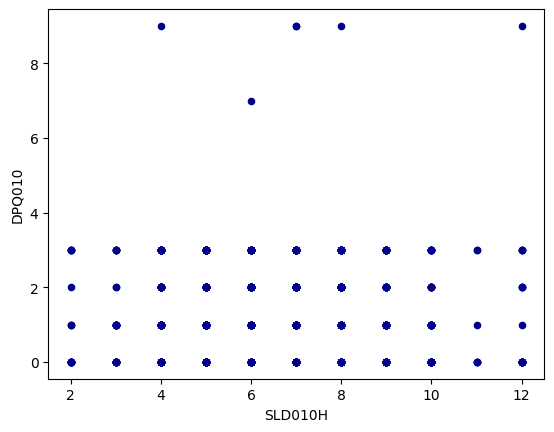

In [ ]:
# Scatter Plot of Hours of Sleep vs. Anxiety Questionaire
# DPQ010, SLD010H

ax1 = data.plot.scatter(x='SLD010H', y='DPQ010',c='DarkBlue')


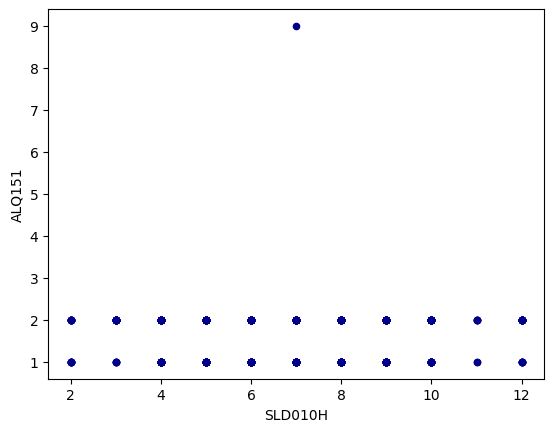

In [ ]:
# Scatter Plot of Hours of Sleep vs. Alcohol Use
# DPQ010, SLD010H

ax1 = data.plot.scatter(x='SLD010H', y='ALQ151',c='DarkBlue')


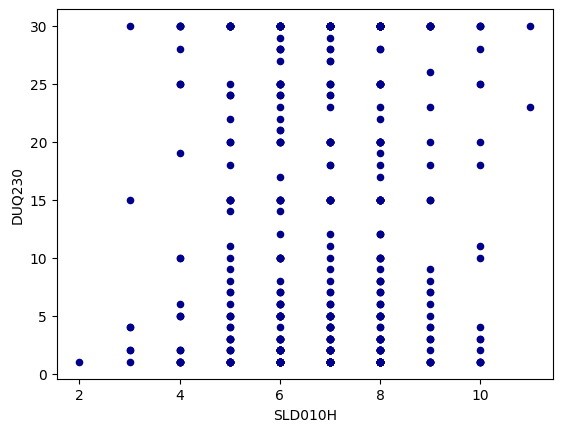

In [ ]:
# Scatter Plot of Hours of Sleep vs. Drug Use (Any)
# DPQ010, SLD010H

ax1 = data.plot.scatter(x='SLD010H', y='DUQ230',c='DarkBlue')


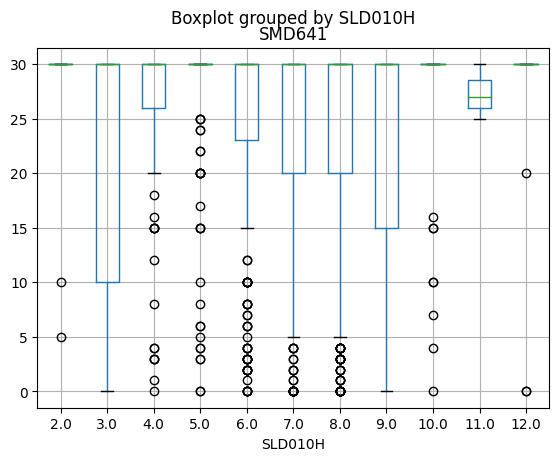

In [ ]:
# Scatter Plot of Hours of Sleep vs. Marijianna
# DPQ010, SLD010H

ax1 = data.boxplot(column=['SMD641'], by='SLD010H')


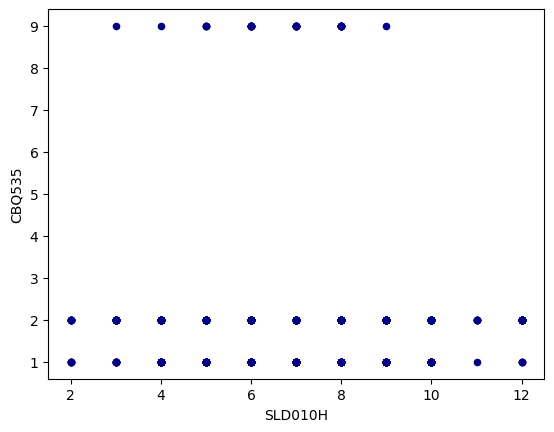

In [ ]:
# Scatter Plot of Hours of Sleep vs. Dietery Fast Food Orders
# DPQ010, SLD010H

ax1 = data.plot.scatter(x='SLD010H', y='CBQ535',c='DarkBlue')


## Data Processing

In [ ]:
# Dictionary to decode and rename column names for better readability
col_decoder = {
'ACD011A' : 'speak_english',
'AIALANGA' : 'speak_english2',
'ALQ101' : 'drink_alcohol',
'ALQ130' : 'alcohol_per_day',
'AUQ136' : 'ear_infections',
'BMDAVSAD' : 'saggital_abdominal_avg',
'BMXARMC' : 'arm_circum',
'BMXBMI' : 'BMI',
'BMXLEG' : 'leg_length',
'BMXSAD1' : 'saggital_abdominal_1',
'BMXSAD2' : 'saggital_abdominal_2',
'BMXWAIST' : 'waist_circum',
'BMXWT' : 'weight_kg',
'BPQ020' : 'high_bp',
'BPQ056' : 'measure_bp_home',
'BPQ059' : 'measure_bp_doctor',
'BPQ060' : 'cholesterol_checked',
'BPQ070' : 'cholesterol_checked_1y',
'BPQ080' : 'high_cholesterol',
'BPQ090D' : 'cholesterol_prescription',
'BPXDI1' : 'diastolic_bp',
'BPXML1' : 'cuff_max_inflation',
'BPXSY1' : 'blood_pressure_1',
'BPXSY2' : 'blood_pressure_2',
'BPXSY3' : 'blood_pressure_3',
'CBD070' : 'grocery_budget',
'CBD090' : 'nonfood_budget',
'CBD110' : 'food_budget',
'CBD120' : 'restaurant_budget',
'CBD130' : 'food_delivery_budget',
'CBQ505' : 'fast_food',
'CBQ535' : 'saw_nutrition_fast_food',
'CBQ545' : 'use_nutrition_fast_food',
'CBQ550' : 'eat_restaurants',
'CBQ552' : 'eat_chain_restaurants',
'CBQ580' : 'saw_nutrition_restaurant',
'CBQ590' : 'use_nutrition_restaurant',
'CBQ596' : 'saw_my_plate',
'CDQ001' : 'chest_pain_ever',
'CDQ010' : 'short_breath_stairs',
'CSQ030' : 'sensative_smell',
'CSQ100' : 'loss_of_taste',
'CSQ110' : 'taste_in_mouth',
'CSQ202' : 'dry_mouth',
'CSQ204' : 'nasal_congestion',
'CSQ210' : 'wisdom_teeth_removed',
'CSQ220' : 'tonsils_removed',
'CSQ240' : 'head_injury',
'CSQ250' : 'broken_nose',
'CSQ260' : 'sinus_infections',
'DBD100' : 'salt_frequency',
'DBD895' : 'meals_not_homemade',
'DBD900' : 'meals_fast_food',
'DBD905' : 'meals_prepackaged',
'DBD910' : 'frozen_meals_per_month',
'DBQ095Z' : 'salt_type',
'DBQ197' : 'milk_product_per_month',
'DBQ229' : 'milk_drinker',
'DBQ700' : 'healthy_diet',
'DEQ034C' : 'long_sleeve_shirt',
'DEQ034D' : 'use_sunscreen',
'DEQ038G' : 'sunburn_1y',
'DIQ010' : 'diabetes',
'DIQ050' : 'taking_insulin',
'DIQ160' : 'prediabetes',
'DIQ170' : 'diabetes_risk',
'DIQ172' : 'diabetes_concern',
'DIQ180' : 'blood_test_3y',
'DLQ010' : 'deaf',
'DLQ020' : 'blind',
'DLQ040' : 'mental_issues',
'DLQ050' : 'difficulty_walking',
'DLQ060' : 'difficulty_dressing',
'DLQ080' : 'difficulty_errands',
'DMDBORN4' : 'born_in_us2',
'DMDHHSIZ' : 'people_in_house',
'DMDHHSZB' : 'children_in_house',
'DMDHHSZE' : 'people_over_60_in_house',
'DMDHRBR4' : 'born_in_us',
'DMDHRGND' : 'gender2',
'DMDMARTL' : 'Marital_Status',
'DMDYRSUS' : 'years_in_US',
'DPQ010' : 'no_interest_2w',
'DPQ020' : 'depression',
'DPQ030' : 'trouble_sleeping_2w',
'DPQ040' : 'fatigue_2w',
'DPQ050' : 'eating_problems_2w',
'DPQ060' : 'feel_bad_2w',
'DPQ070' : 'trouble_concentrating_2w',
'DPQ080' : 'speaking_problems_2w',
'DPQ090' : 'suicidal_2w',
'DPQ100' : 'depression_difficulty',
'DR1.320Z' : 'water',
'DR1_320Z' : 'plain_water_yesterday',
'DR1_330Z' : 'tap_water_yesterday',
'DR1BWATZ' : 'bottled_water_yesterday',
'DR1HELPD' : 'interview_help',
'DR1TACAR' : 'dietary_alpha_carotene',
'DR1TALCO' : 'alcohol',
'DR1TATOC' : 'dietary_vitamin_e',
'DR1TBCAR' : 'dietary_beta_carotene',
'DR1TCAFF' : 'caffeine',
'DR1TCALC' : 'dietary_calcium',
'DR1TCARB' : 'carb',
'DR1TCHL' : 'dietary_choline',
'DR1TCHOL' : 'cholesterol',
'DR1TCOPP' : 'dietary_copper',
'DR1TCRYP' : 'dietary_beta_cryptoxanthin',
'DR1TFA' : 'dietary_folic_acid',
'DR1TFF' : 'folate_food',
'DR1TFIBE' : 'fiber',
'DR1TFOLA' : 'dietary_folate',
'DR1TIRON' : 'dietary_iron',
'DR1TKCAL' : 'calories',
'DR1TLYCO' : 'dietary_lycopene',
'DR1TLZ' : 'dietary_lutein',
'DR1TM181' : 'octadecenoic_percent',
'DR1TMAGN' : 'magnesium',
'DR1TMFAT' : 'monounsaturated_fats',
'DR1TMOIS' : 'moisture',
'DR1TNIAC' : 'dietary_niacin',
'DR1TP183' : 'octadecatrienoic_percent',
'DR1TPHOS' : 'dietary_phosphorus',
'DR1TPOTA' : 'dietary_potassium',
'DR1TPROT' : 'protein',
'DR1TRET' : 'dietary_retinol',
'DR1TS140' : 'tetradeconoic_percent',
'DR1TSELE' : 'dietary_selenium',
'DR1TSODI' : 'sodium',
'DR1TSUGR' : 'sugar',
'DR1TTFAT' : 'fat',
'DR1TTHEO' : 'dietary_theobromine',
'DR1TVARA' : 'dietary_vitamin_a',
'DR1TVB1' : 'dietary_b1',
'DR1TVB12' : 'dietary_b12',
'DR1TVB2' : 'dietary_b2',
'DR1TVB6' : 'dietary_b6',
'DR1TVC' : 'dietary_vit_c',
'DR1TVD' : 'dietary_vit_d',
'DR1TVK' : 'dietary_vit_k',
'DR1TZINC' : 'dietary_zinc',
'DRABF' : 'breast_fed',
'DRD340' : 'shellfish',
'DRD350A' : 'clams',
'DRD350B' : 'crabs',
'DRD350C' : 'crayfish',
'DRD350D' : 'lobsters',
'DRD350E' : 'mussels',
'DRD350F' : 'oysters',
'DRD350G' : 'scallops',
'DRD350H' : 'shrimp',
'DRD370A' : 'breaded_fish',
'DRD370B' : 'tuna',
'DRD370C' : 'bass',
'DRD370D' : 'catfish',
'DRD370E' : 'cod',
'DRD370F' : 'flatfish',
'DRD370G' : 'haddock',
'DRD370H' : 'mackerel',
'DRD370I' : 'perch',
'DRD370J' : 'pike',
'DRD370K' : 'pollock',
'DRD370L' : 'porgy',
'DRD370M' : 'salmon',
'DRD370N' : 'sardines',
'DRD370O' : 'sea_bass',
'DRD370P' : 'shark',
'DRD370Q' : 'swordfish',
'DRD370R' : 'trout',
'DRD370S' : 'walleye',
'DRD370T' : 'other_fish',
'DRQSDIET' : 'special_diet',
'DRQSDT1' : 'low_cal_diet',
'DRQSDT10' : 'high_protein_diet',
'DRQSDT11' : 'low_gluten_diet',
'DRQSDT12' : 'kidney_diet',
'DRQSDT2' : 'low_fat_diet',
'DRQSDT3' : 'low_salt_diet',
'DRQSDT4' : 'low_sugar_diet',
'DRQSDT5' : 'low_fiber_diet',
'DRQSDT6' : 'high_fiber_diet',
'DRQSDT7' : 'diabetic_diet',
'DRQSDT8' : 'muscle_diet',
'DRQSDT9' : 'low_carb_diet',
'DRQSDT91' : 'other_diet',
'DRQSPREP' : 'salt_used',
'DUQ200' : 'marijuana',
'DUQ370' : 'needle_drugs',
'FSD032A' : 'food_insecure',
'FSD032B' : 'not_enough_food',
'FSD032C' : 'cheap_food',
'FSD032D' : 'cheap_food_children',
'FSD032E' : 'bad_food_children',
'FSD032F' : 'low_food_children',
'FSD151' : 'emergency_food_received',
'FSDAD' : 'food_secure',
'FSDCH' : 'child_food_secure',
'FSDHH' : 'household_food_secure',
'FSQ162' : 'wic_received',
'FSQ165' : 'food_stamps',
'HEQ010' : 'hepetitis_b',
'HEQ030' : 'hepetitis_c',
'HIQ011' : 'health_insurance',
'HIQ210' : 'insurance_gap',
'HIQ270' : 'prescription_insurance',
'HOD050' : 'rooms_in_home',
'HOQ065' : 'homeowner',
'HSAQUEX' : 'health_status_source_data',
'HSD010' : 'general_health',
'HSQ500' : 'ever_had_cold',
'HSQ510' : 'intestinal_illness',
'HSQ520' : 'ever_had_flu',
'HSQ571' : 'donate_blood',
'HSQ590' : 'hiv',
'HUQ010' : 'general_health2',
'HUQ020' : 'health_compared_last_year',
'HUQ030' : 'routine_healthcare',
'HUQ041' : 'healthcare_location',
'HUQ051' : 'dr_visits',
'HUQ071' : 'overnight_hospital',
'HUQ090' : 'mental_health_treatment',
'IMQ011' : 'hepatitis_a_vaccine',
'IMQ020' : 'hepatitis_b_vaccine',
'IND235' : 'monthly_income',
'INDFMMPC' : 'poverty_level_category',
'INDFMMPI' : 'poverty_level_index',
'INDFMPIR' : 'family_income',
'INQ012' : 'self_employ_income',
'INQ020' : 'income_from_wages',
'INQ030' : 'income_from_SS',
'INQ060' : 'disability_income',
'INQ080' : 'retirement_income',
'INQ090' : 'ss_income',
'INQ132' : 'state_assistance_income',
'INQ140' : 'investment_income',
'INQ150' : 'other_income',
'INQ244' : 'family_savings',
'LBDBCDLC' : 'blood_cadmium',
'LBDBGMLC' : 'methyl_mercury',
'LBDHDD' : 'HDL_mg',
'LBDIHGLC' : 'inorganic_mercury',
'LBDNENO' : 'neutrophils_percent',
'LBDTHGLC' : 'blood_mercury',
'LBDWFL' : 'floride_water',
'LBXEOPCT' : 'eosinophils_percent',
'LBXGH' : 'glyco_hemoglobin',
'LBXLYPCT' : 'lymphocite_percent',
'LBXMC' : 'hemoglobin_concentration',
'LBXSAL' : 'blood_albumin',
'LBXSCA' : 'blood_calcium',
'LBXSGL' : 'serum_glucose_mg',
'LBXSTP' : 'blood_protein',
'MCQ010' : 'asthma_ever',
'MCQ025' : 'asthma_age',
'MCQ035' : 'asthma',
'MCQ040' : 'asthma_year',
'MCQ050' : 'asthma_ER',
'MCQ053' : 'anemia',
'MCQ070' : 'psoriasis',
'MCQ080' : 'overweight',
'MCQ082' : 'celiac_disease',
'MCQ086' : 'gluten_free',
'MCQ092' : 'blood_transfusion',
'MCQ149' : 'menstruate',
'MCQ151' : 'menstruate_age',
'MCQ160A' : 'arthritis',
'MCQ160B' : 'congestive_heart_failure',
'MCQ160C' : 'coronary_heart_disease',
'MCQ160D' : 'angina',
'MCQ160E' : 'heart_attack',
'MCQ160F' : 'stroke',
'MCQ160G' : 'emphysema',
'MCQ160K' : 'bronchitis_ever',
'MCQ160L' : 'liver_condition_ever',
'MCQ160M' : 'thyroid_ever',
'MCQ160N' : 'gout',
'MCQ160O' : 'COPD',
'MCQ170K' : 'bronchitis_now',
'MCQ170L' : 'liver_condition',
'MCQ170M' : 'thyroid_now',
'MCQ180A' : 'arthritis_age',
'MCQ180B' : 'heart_failure_age',
'MCQ180C' : 'heart_disease_age',
'MCQ180D' : 'angina_age',
'MCQ180E' : 'heart_attack_age',
'MCQ180F' : 'stroke_age',
'MCQ180G' : 'emphysema_age',
'MCQ180K' : 'bronchitis_age',
'MCQ180L' : 'liver_condition_age',
'MCQ180M' : 'thyroid_age',
'MCQ180N' : 'gout_age',
'MCQ195' : 'arthritis_type',
'MCQ203' : 'jaundice',
'MCQ206' : 'jaundice_age',
'MCQ220' : 'cancer',
'MCQ230A' : 'cancer_type1',
'MCQ230B' : 'cancer_type2',
'MCQ230C' : 'cancer_type3',
'MCQ230D' : 'cancer_type4',
'MCQ240A' : 'bladder_cancer_age',
'MCQ240AA' : 'test_cancer_age',
'MCQ240B' : 'blood_cancer_age',
'MCQ240BB' : 'thyroid_cancer_age',
'MCQ240C' : 'bone_cancer_age',
'MCQ240CC' : 'uterine_cancer_age',
'MCQ240D' : 'brain_cancer_age',
'MCQ240DK' : 'cancer_age',
'MCQ240E' : 'breast_cancer_age',
'MCQ240F' : 'cervical_cancer_age',
'MCQ240G' : 'colon_cancer_age',
'MCQ240H' : 'esoph_cancer_age',
'MCQ240I' : 'gallbladder_cancer_age',
'MCQ240J' : 'kidney_cancer_age',
'MCQ240K' : 'larynx_cancer_age',
'MCQ240L' : 'leukemia_age',
'MCQ240M' : 'liver_cancer_age',
'MCQ240N' : 'lung_cancer_age',
'MCQ240O' : 'lymphoma_age',
'MCQ240P' : 'melanoma_age',
'MCQ240Q' : 'mouth_cancer_age',
'MCQ240R' : 'nervous_cancer_age',
'MCQ240S' : 'ovarian_cancer_age',
'MCQ240T' : 'pancreatic_cancer_age',
'MCQ240U' : 'prostate_cancer_age',
'MCQ240V' : 'rectal_cancer_age',
'MCQ240X' : 'skin_cancer_age',
'MCQ240Y' : 'soft_cancer_age',
'MCQ240Z' : 'stomach_cancer_age',
'MCQ300A' : 'relative_heart_attack',
'MCQ300B' : 'relative_asthma',
'MCQ300C' : 'relative_diabetes',
'MCQ365A' : 'need_weight_loss',
'MCQ365B' : 'need_exercise',
'MCQ365C' : 'need_reduce_salt',
'MCQ365D' : 'need_reduce_calories',
'MCQ370A' : 'losing_weight',
'MCQ370B' : 'excercising',
'MCQ370C' : 'reducing_salt',
'MCQ370D' : 'reducing_fat',
'MGDCGSZ' : 'grip_strength',
'OCD150' : 'work_done',
'OCD270' : 'months_of_work',
'OCD390G' : 'type_of_work',
'OCD395' : 'job_duration',
'OCQ260' : 'non_govt_employee',
'OHQ030' : 'visit_dentist',
'OHQ033' : 'dentist_reason',
'OHQ620' : 'aching_mouth',
'OHQ640' : 'mouth_problems',
'OHQ680' : 'mouth_problems2',
'OHQ770' : 'need_dental',
'OHQ835' : 'gum_disease',
'OHQ845' : 'teeth_health',
'OHQ850' : 'gum_treatment',
'OHQ855' : 'loose_teeth',
'OHQ860' : 'teeth_bone_loss',
'OHQ865' : 'weird_tooth',
'OHQ870' : 'floss',
'OHQ875' : 'use_mouthwash',
'OHQ880' : 'oral_cancer_exam',
'OHQ885' : 'oral_cancer_exam2',
'OSQ060' : 'osteoporosis',
'OSQ130' : 'take_prednisone',
'OSQ230' : 'metal_objects',
'PAAQUEX' : 'question_source',
'PAD680' : 'sedentary_time',
'PAQ605' : 'vigorous_work',
'PAQ620' : 'moderate_work',
'PAQ635' : 'walk_or_bike',
'PAQ650' : 'vigorous_recreation',
'PAQ665' : 'moderate_recreation',
'PAQ710' : 'tv_hours',
'PAQ715' : 'pc_hours',
'PEASCST1' : 'bp_status',
'PEASCTM1' : 'blood_pressure_time',
'PFQ049' : 'work_limitations',
'PFQ051' : 'work_limitations2',
'PFQ054' : 'walk_equipment_required',
'PFQ057' : 'confusion_memory_problems',
'PFQ090' : 'special_healthcare_equipment',
'PUQ100' : 'insecticide_used',
'PUQ110' : 'weedkiller_used',
'RIAGENDR' : 'gender',
'RIDAGEYR' : 'age',
'RIDRETH1' : 'hispanic',
'RXQ510' : 'take_aspirin',
'SEQN' : 'ID',
'SLD010H' : 'sleep_hours',
'SLQ050' : 'trouble_sleeping',
'SLQ060' : 'sleep_disorder',
'SMAQUEX.x' : 'question_mode',
'SMAQUEX.y' : 'question_mode2',
'SMAQUEX2' : 'question_mode3',
'SMD460' : 'smokers_in_house',
'SMDANY' : 'tobaco_1w',
'SMQ681' : 'smoked_1w',
'SMQ851' : 'tobaco2_1w',
'SMQ856' : 'smoked_at_work',
'SMQ858' : 'someone_smoked_at_job',
'SMQ860' : 'smoked_at_restaurant',
'SMQ863' : 'nicotine_1w',
'SMQ866' : 'smoked_at_bar',
'SMQ870' : 'smoked_in_car',
'SMQ872' : 'someone_smoked_in_car',
'SMQ874' : 'smoked_another_home',
'SMQ876' : 'someone_smoked_in_home',
'SMQ878' : 'smoked_other_building',
'SMQ880' : 'someone_smoked_other_building',
'SXD021' : 'sex_ever',
'URXUCR' : 'creatinine_urine',
'WHD010' : 'height_in',
'WHD020' : 'current_weight_lb',
'WHD050' : 'weight_1y',
'WHD110' : 'weight_10y',
'WHD120' : 'weight_age_25',
'WHD140' : 'greatest_weight',
'WHQ030' : 'overweight_self',
'WHQ040' : 'weightloss_desire',
'WHQ070' : 'weightloss_attempt',
'WHQ150' : 'age_when_heaviest'
}

# Renaming columns of each DataFrame using the col_decoder dictionary for better readability
df = df.rename(columns=col_decoder)
labs = labs.rename(columns=col_decoder)
exam = exam.rename(columns=col_decoder)
demo = demo.rename(columns=col_decoder)
diet = diet.rename(columns=col_decoder)
ques = ques.rename(columns=col_decoder)

In [ ]:
# Isolates the "answer key" for model to compare answers against (drops everything else)
diabetes_df = df.dropna(subset=['diabetes'])

# target_dfs = [cancer_df, diabetes_df, heart_df, liver_df]
target_dfs = [diabetes_df]

# Combinations of 7s and 9s are used when data is not applicable or when the patient refused to answer (processing answer key)
for df in target_dfs:
    df.replace({7:None, 9:None, 77:None,99:None,777:None,999:None,7777:None,9999:None,77777:None,99999:None,
            777777:None,999999:None,55:None,555:None,5555:None,8:None,88:None}, inplace=True)

In [ ]:
#Provides function to remove columns and rows with excessive nulls

def filter_columns(df, cutoff=0.9):
    tot_rows = df.shape[0]
    removed_cols = []
    print("original number of columns: ", df.shape[1])
    for col in df.columns:
        num_na = df[col].isna().sum()
        if (num_na/tot_rows) > cutoff:
            #print(col, df[col].isna().sum())
            removed_cols.append(col)
    print("number of columns removed: ", len(removed_cols))
    return df.drop(removed_cols, axis=1)

def filter_rows(df, cutoff=0.9):
    tot_cols = df.shape[1]
    print("original number of rows: ", df.shape[0])
    df = df[df.isnull().sum(axis=1) < tot_cols*cutoff]
    print("remaining rows: ", df.shape[0])
    return df

def trans_cat_cols(df, cat_cols):
    for col in cat_cols:
        df.loc[df[col] != 1, col] = 0
    return df

In [ ]:
# drops row if the fraction of null values in the row is greater then the cutoff
# drops column if the fraction of null values in the row is greater then the cutoff
x = df.nunique()
cat_cols = x[(x<15)].index
df = trans_cat_cols(df, cat_cols)

In [ ]:
# drops row if the fraction of null values in the row is greater then the cutoff
# drops column if the fraction of null values in the row is greater then the cutoff
for df in target_dfs:
    x = df.nunique()
    cat_cols = x[(x<15)].index
    df = trans_cat_cols(df, cat_cols)

In [ ]:
# drops row if the fraction of null values in the row is greater then the cutoff
# drops column if the fraction of null values in the row is greater then the cutoff
for df in target_dfs:
    df = filter_rows(df, cutoff=0.8)
    df = filter_columns(df, cutoff=0.5)

original number of rows:  9422
remaining rows:  9422
original number of columns:  1766
number of columns removed:  281


In [ ]:
# replaces invalid values with the mode
for df in target_dfs:
    print(df.isna().sum())
    df.fillna(df.mode().iloc[0], inplace=True)

ID                      1
URXUMA               1863
URXUMS               1863
URXUCR.x             1884
URXCRS               1696
                     ... 
greatest_weight      3622
age_when_heaviest    3821
WHQ030M                 0
WHQ500                  0
WHQ520                  0
Length: 1766, dtype: int64


In [ ]:
lifestyle_cols = ['drink_alcohol','alcohol_per_day','saggital_abdominal_avg','arm_circum','BMI',
                  'saggital_abdominal_1','saggital_abdominal_2','waist_circum','weight_kg',
                  'grocery_budget','nonfood_budget','food_budget',
                  'restaurant_budget','food_delivery_budget','fast_food','saw_nutrition_fast_food',
                  'use_nutrition_fast_food','eat_restaurants','eat_chain_restaurants','saw_nutrition_restaurant',
                  'use_nutrition_restaurant','saw_my_plate','wisdom_teeth_removed','tonsils_removed',
                  'salt_frequency','meals_not_homemade','meals_fast_food','meals_prepackaged',
                  'frozen_meals_per_month','salt_type','milk_product_per_month','milk_drinker','healthy_diet',
                  'long_sleeve_shirt','use_sunscreen','people_in_house','children_in_house','Marital_Status',
                  'trouble_sleeping_2w','eating_problems_2w','water','plain_water_yesterday','tap_water_yesterday',
                  'bottled_water_yesterday','dietary_alpha_carotene','alcohol','dietary_vitamin_e',
                  'dietary_beta_carotene','caffeine','dietary_calcium','carb','dietary_choline','cholesterol',
                  'dietary_copper','dietary_beta_cryptoxanthin','dietary_folic_acid','folate_food','fiber',
                  'dietary_folate','dietary_iron','calories','dietary_lycopene','dietary_lutein',
                  'octadecenoic_percent','magnesium','monounsaturated_fats','moisture','dietary_niacin',
                  'octadecatrienoic_percent','dietary_phosphorus','dietary_potassium','protein','dietary_retinol',
                  'tetradeconoic_percent','dietary_selenium','sodium','sugar','fat','dietary_theobromine',
                  'dietary_vitamin_a','dietary_b1','dietary_b12','dietary_b2','dietary_b6','dietary_vit_c',
                  'dietary_vit_d','dietary_vit_k','dietary_zinc','shellfish','clams','crabs','crayfish',
                  'lobsters','mussels','oysters','scallops','shrimp','breaded_fish','tuna','bass','catfish',
                  'cod','flatfish','haddock','mackerel','perch','pike','pollock','porgy','salmon','sardines',
                  'sea_bass','shark','swordfish','trout','walleye','other_fish','special_diet','low_cal_diet',
                  'high_protein_diet','low_gluten_diet','kidney_diet','low_fat_diet','low_salt_diet','low_sugar_diet',
                  'low_fiber_diet','high_fiber_diet','muscle_diet','low_carb_diet','other_diet','salt_used',
                  'marijuana','needle_drugs','food_insecure','not_enough_food','cheap_food','cheap_food_children',
                  'bad_food_children','low_food_children','emergency_food_received','food_secure','child_food_secure',
                  'household_food_secure','wic_received','food_stamps','health_insurance','insurance_gap',
                  'prescription_insurance','donate_blood','routine_healthcare','healthcare_location','dr_visits',
                  'hepatitis_a_vaccine','hepatitis_b_vaccine','neutrophils_percent','floride_water',
                  'overweight','gluten_free','losing_weight','excercising',
                  'reducing_salt','reducing_fat','work_done','months_of_work','type_of_work','job_duration',
                  'non_govt_employee','visit_dentist','floss','use_mouthwash','take_prednisone','sedentary_time',
                  'vigorous_work','moderate_work','walk_or_bike','vigorous_recreation','moderate_recreation',
                  'tv_hours','pc_hours','bp_status','insecticide_used','weedkiller_used','age',
                  'sleep_hours','smokers_in_house','tobaco_1w','smoked_1w','tobaco2_1w','smoked_at_work',
                  'someone_smoked_at_job','smoked_at_restaurant','nicotine_1w','smoked_at_bar','smoked_in_car',
                  'someone_smoked_in_car','smoked_another_home','someone_smoked_in_home','smoked_other_building',
                  'someone_smoked_other_building','weight_1y','weight_10y','weight_age_25','greatest_weight',
                  'overweight_self','weightloss_desire','weightloss_attempt']

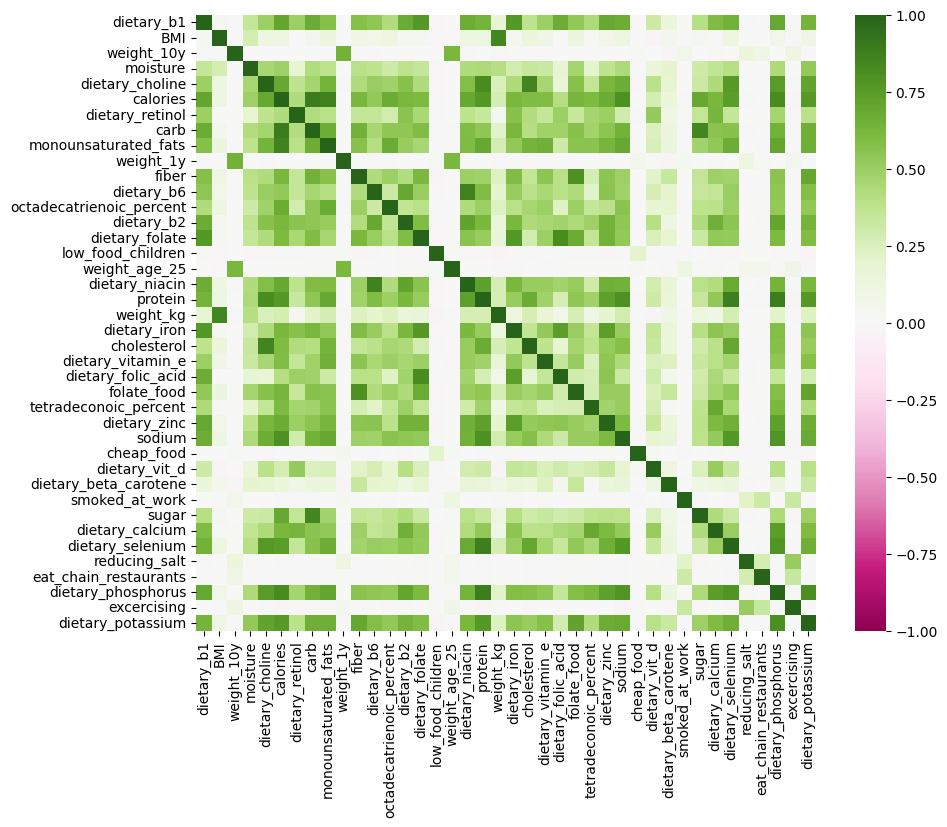

In [ ]:
# Loop through each DataFrame in the list of target DataFrames
for df in target_dfs:
    # Extract the subset of columns that are in both the DataFrame and the lifestyle_cols list
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]

    # Calculate the correlation matrix for the extracted DataFrame
    corr = ex_df.corr()

    # Mask the lower triangle of the correlation matrix to avoid redundancy
    corr = corr.mask(np.tril(np.ones(corr.shape)).astype(bool))

    # Identify redundant columns with a correlation coefficient above 0.9
    redun = corr[abs(corr) >= 0.9].stack().reset_index()['level_1']

    # Drop the redundant columns from the extracted DataFrame
    ex_df = ex_df.drop(redun, axis=1)

    # Recalculate the correlation matrix for the reduced DataFrame
    corr = ex_df.corr()
    corr = corr.mask(np.tril(np.ones(corr.shape)).astype(bool))

    # Identify columns with a maximum correlation coefficient above 0.5
    big_corr = ex_df[corr[abs(corr).max() > 0.5].index].corr()
    big_corr = big_corr.mask(np.tril(np.ones(big_corr.shape)).astype(bool))

    # Further refine the correlation matrix to include only highly correlated columns
    big_corr = ex_df[big_corr[abs(big_corr).max() > 0.5].index].corr()

    # Plot the heatmap of the final refined correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(big_corr,
                xticklabels=big_corr.columns,
                yticklabels=big_corr.columns,
                cmap="PiYG",
                vmin=-1, vmax=1)


In [ ]:
# Function to replace all string values in a column with the mode of that column
def replace_with_mode(column):
    mode_value = column.mode().iloc[0]

    def replace_string(cell_value):
        if isinstance(cell_value, str):
            return mode_value
        else:
            return cell_value

    column = column.apply(replace_string)
    return column

# Apply the replace_with_mode function to each column in the DataFrame
for column in df:
    df[column] = replace_with_mode(df[column])


In [ ]:
print(df["diabetes"].value_counts())

0.0    8709
1.0     713
Name: diabetes, dtype: int64


In [ ]:
# removing no match
problems = []

for column in df:
  if "* NO MATCH *" in df[column].values or type(df[column].values[0]) == str:
    problems.append(column)
print(problems)

<ipython-input-28-9bc013ce163b>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "* NO MATCH *" in df[column].values or type(df[column].values[0]) == str:


['SMDUPCA', 'SMD100BR']


In [ ]:
"""
Filtering columns made it so some lifestyle colunms were removed.
In order to use them for training we need to make sure that all the columns
selected are still in df so we take the intersection of the column names
"""
# Model uses columns that are in both lifestyle and df.columns
lifestyle_cols_remain = set(lifestyle_cols).intersection(set(df.columns))
print(lifestyle_cols_remain)

{'insurance_gap', 'pc_hours', 'dietary_copper', 'dr_visits', 'frozen_meals_per_month', 'non_govt_employee', 'magnesium', 'scallops', 'wic_received', 'someone_smoked_at_job', 'vigorous_work', 'salmon', 'cod', 'meals_fast_food', 'long_sleeve_shirt', 'overweight', 'tuna', 'dietary_alpha_carotene', 'waist_circum', 'bass', 'cheap_food_children', 'dietary_vitamin_a', 'smoked_other_building', 'low_sugar_diet', 'sardines', 'saw_my_plate', 'healthy_diet', 'losing_weight', 'greatest_weight', 'saggital_abdominal_2', 'someone_smoked_other_building', 'dietary_b1', 'tobaco_1w', 'food_delivery_budget', 'saggital_abdominal_1', 'water', 'sleep_hours', 'dietary_vit_c', 'flatfish', 'milk_product_per_month', 'food_insecure', 'low_fat_diet', 'porgy', 'low_carb_diet', 'smoked_another_home', 'dietary_theobromine', 'food_budget', 'dietary_beta_cryptoxanthin', 'low_gluten_diet', 'BMI', 'tobaco2_1w', 'trouble_sleeping_2w', 'moderate_work', 'weight_10y', 'moisture', 'dietary_choline', 'calories', 'someone_smoked

## Model Training and Creation

In [ ]:
k = 100 # number of neighbors to consider
N = 69 # number of models in random forest classifier (must be odd to avoid ties)
N = 69  # number of models in random forest classifier (must be odd to avoid ties)
y = df["diabetes"].copy()
X = df[list(lifestyle_cols_remain)]  # Convert to a list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=69)
print(y_train.sum(), y_test.sum())

666.0 47.0


In [ ]:
# Using built in sklearn random forest classifier

# model = RandomForestClassifier(n_estimators = 10, random_state=420, class_weight={0: 1.0, 1: 9.0}, max_depth=3)
model = RandomForestClassifier(n_estimators = 150,
                               random_state=420,
                               class_weight='balanced',
                               max_depth=30,
                               criterion = 'log_loss',
                               min_samples_leaf=16,
                               min_samples_split=30)
# model = RandomForestClassifier(random_state=420)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The forest is right {accuracy}% of the time!')

The forest is right 0.8771186440677966% of the time!


In [ ]:
# custom random forest classifier
# create a list filled with as many 0's as the answer key
# voting = np.zeros_like(y_test)
# print(accuracy_score(y_test, voting))

# for modelNum in range(int(N)):
#   treeTrainX, _, treeTrainY, _ = train_test_split(X_train, y_train, test_size=0.10, random_state=modelNum)
#   knn = KNeighborsClassifier(n_neighbors=k)
#   knn.fit(treeTrainX, treeTrainY)
#   y_pred = knn.predict(X_test)
#   accuracy = accuracy_score(y_test, y_pred)
#   print(f'Model Number{modelNum} Accuracy: {accuracy}')
#   # print(y_pred[0:10], y_test[0:10])
#   voting += y_pred

# # Averaging answers of the trees
# voting = np.round((voting/N))
# accuracy = accuracy_score(y_test, voting)
# print(f'The forest is right {accuracy}% of the time!')

## Model Troubleshooting and Hyperparameter Optimization

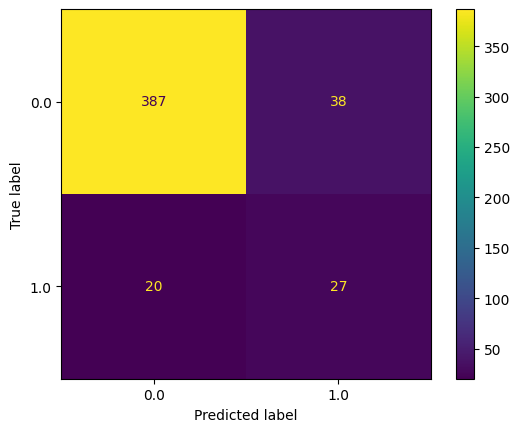

In [ ]:
#confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
def model_metrics(y_test, y_pred):
  return(
  {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred)
  }
  )

In [ ]:
model_metrics(y_test, y_pred)

{'accuracy': 0.8771186440677966,
 'precision': 0.4153846153846154,
 'recall': 0.574468085106383,
 'f1': 0.48214285714285715}

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 16,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 420,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# RandomizedSearchCV for hyperparameter tuning
# search space is just most common search space for each hyperparameter

parameter_space = {
    'bootstrap': [True, False],
    'ccp_alpha': [0.0],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 2, 5, 10, 20, 50, 100],
    'max_samples': [None],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'n_jobs': [-1],
    'oob_score': [False],
    # 'random_state': 420,
    # 'verbose': [0],
    'warm_start': [False]
  }

# adjusting number of iterations is still necessary
optimizer = RandomizedSearchCV(model, parameter_space, scoring = 'f1', n_iter=5)

optimizer.fit(X_train, y_train)

optimizer.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=30, max_leaf_nodes=5,
                       min_impurity_decrease=0.2, min_samples_split=10,
                       min_weight_fraction_leaf=0.4, n_estimators=200,
                       n_jobs=-1, random_state=420)

In [ ]:
pd.DataFrame(optimizer.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_oob_score,param_n_jobs,param_n_estimators,param_min_weight_fraction_leaf,param_min_samples_split,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.098176,0.187804,0.071722,0.007103,True,True,-1,150,0.1,20,...,True,"{'warm_start': True, 'oob_score': True, 'n_job...",0.238477,0.293059,0.312057,0.317862,0.312925,0.294876,0.02944,1


In [ ]:
# goal of 75%+
y_pred = optimizer.best_estimator_.predict(X_test)

model_metrics(y_test, y_pred)



{'accuracy': 0.663135593220339,
 'precision': 0.1956521739130435,
 'recall': 0.7659574468085106,
 'f1': 0.31168831168831174}

## Manual Hyperparameter Tuning

In [ ]:
# GridSearchCV for hyperparameter tuning by hand
# search space is adjust one by one

parameter_space = {
    'bootstrap': [True],
    'ccp_alpha': [0.1],
    'class_weight': ['balanced'], #0.388
    'criterion': ['gini'], #0.3957
    'max_depth': [20], #0.3957
    'max_features': ['log2'], #0.4
    'max_leaf_nodes': [5],
    'max_samples': [0.8], #0.40437
    'min_impurity_decrease': [0.02],
    'min_samples_leaf': [4],
    'min_samples_split': [20],
    'min_weight_fraction_leaf': [0.1],
    'n_estimators': [150],
    'n_jobs': [-1],
    'oob_score': [True],
    # 'random_state': 420,
    # 'verbose': [0],
    'warm_start': [True]
  }

# adjusting number of iterations is still necessary
optimizer = RandomizedSearchCV(model, parameter_space, scoring = 'f1')

optimizer.fit(X_train, y_train)

print(optimizer.best_estimator_)

y_pred = optimizer.best_estimator_.predict(X_test)

model_metrics(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanc

RandomForestClassifier(ccp_alpha=0.1, class_weight='balanced', max_depth=20,
                       max_features='log2', max_leaf_nodes=5, max_samples=0.8,
                       min_impurity_decrease=0.02, min_samples_leaf=4,
                       min_samples_split=20, min_weight_fraction_leaf=0.1,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=420, warm_start=True)


{'accuracy': 0.7372881355932204,
 'precision': 0.25477707006369427,
 'recall': 0.851063829787234,
 'f1': 0.39215686274509803}